In [2]:
import pandas as pd
import numpy as np
import copy
import data_pre_proces
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
data_black_fraiday = pd.read_csv("correctBF.csv", header=None,sep=',')
data_black_fraiday.columns = [i for i in  data_black_fraiday.loc[[0]].values[0]]
data_black_fraiday = data_black_fraiday.drop([0])
data_black_fraiday.index = range(data_black_fraiday.shape[0])
#Print the original version of data
print(data_black_fraiday)

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        User_ID Product_ID Gender    Age Occupation City_Category  \
0       1000001  P00069042      F   0-17         10             A   
1       1000001  P00248942      F   0-17         10             A   
2       1000001  P00087842      F   0-17         10             A   
3       1000001  P00085442      F   0-17         10             A   
4       1000002  P00285442      M    55+         16             C   
5       1000003  P00193542      M  26-35         15             A   
6       1000004  P00184942      M  46-50          7             B   
7       1000004  P00346142      M  46-50          7             B   
8       1000004   P0097242      M  46-50          7             B   
9       1000005  P00274942      M  26-35         20             A   
10      1000005  P00251242      M  26-35         20             A   
11      1000005  P00014542      M  26-35         20             A   
12      1000005  P00031342      M  26-35         20             A   
13      1000005  P00145042      M 

C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

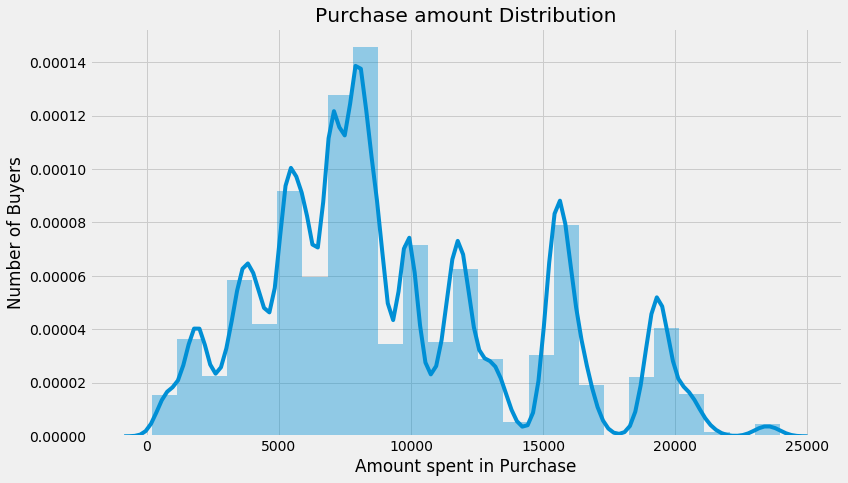

In [4]:
dct_for_age = {'0-17': 0, '18-25': 1 ,'26-35': 2, '36-45' : 3, '46-50' : 4, '51-55' : 5, '55+' : 6}
def modification_of_data(data,name_of_col,dct):
    for i in dct.keys():
        data.loc[data[name_of_col] == i, name_of_col] = dct[i]
    return data
#Modification of data and numeric imputation
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'Gender')
data = modification_of_data(data,'Age',dct_for_age)
data.loc[data['Stay_In_Current_City_Years'] == '4+', 'Stay_In_Current_City_Years'] = '4'
data.Gender = pd.to_numeric(data.Gender)
data.Occupation = pd.to_numeric(data.Occupation)
data = data_pre_proces.elements_col_to_int(data_black_fraiday,'City_Category')
data.Purchase = pd.to_numeric(data.Purchase)
data.Stay_In_Current_City_Years = pd.to_numeric(data.Stay_In_Current_City_Years)
data.Marital_Status = pd.to_numeric(data.Marital_Status)
data.Product_Category_1 = pd.to_numeric(data.Product_Category_1)
data.Product_Category_2 = pd.to_numeric(data.Product_Category_2)
data.Product_Category_3 = pd.to_numeric(data.Product_Category_3)
data['Product_ID'] = data['Product_ID'].str.replace('P00', '')
data.Product_ID = pd.to_numeric(data.Product_ID)
# show the distribution of the price ---> it looks like normal distribution per Number of Buyers 
def plot_show(data,col_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(12,7))
    sns.distplot(data[col_name], bins = 25)
    plt.xlabel("Amount spent in Purchase")
    plt.ylabel("Number of Buyers")
    plt.title("Purchase amount Distribution")
plot_show(data_black_fraiday,'Purchase')    
data_reserv_data_black_fraiday = copy.deepcopy(data_black_fraiday)
print(data)

In [8]:
data_reserv = copy.deepcopy(data)
#Looking for missing values
data['Product_Category_3']= \
data['Product_Category_3'].fillna(round(data['Product_Category_3'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
#################################################
#################################################
#################################################
data['Product_Category_2']= \
data['Product_Category_2'].fillna(round(data['Product_Category_2'].mean(),0)).astype('float')
data.Product_Category_3.value_counts().sort_index()
data_for_classification = data[pd.core.indexes.base.Index(['Product_Category_1','Product_Category_2','Product_Category_3'])]
print(data)

        User_ID  Product_ID  Gender Age  Occupation  City_Category  \
0       1000001       69042       0   0          10              0   
1       1000001      248942       0   0          10              0   
2       1000001       87842       0   0          10              0   
3       1000001       85442       0   0          10              0   
4       1000002      285442       1   6          16              1   
5       1000003      193542       1   2          15              0   
6       1000004      184942       1   4           7              2   
7       1000004      346142       1   4           7              2   
8       1000004       97242       1   4           7              2   
9       1000005      274942       1   2          20              0   
10      1000005      251242       1   2          20              0   
11      1000005       14542       1   2          20              0   
12      1000005       31342       1   2          20              0   
13      1000005     

In [9]:
from sklearn.decomposition import PCA
def data_for_classification(data1):
    X = data1[pd.core.indexes.base.Index(['Product_Category_1','Product_Category_2','Product_Category_3','City_Category'])]
    pca = PCA(n_components=1)
    pca.fit(X)
    return pca.transform(X)
data_y = data_for_classification(data)


target = 'Classification'
from sklearn.model_selection import train_test_split
data[target] = data_y
train_df, test_df, Y_train, Y_test = train_test_split (data, data_y, test_size = 0.20, random_state=42)

In [10]:
predictors = train_df.columns.drop(['Purchase','Product_ID','User_ID','Product_Category_1','Product_Category_2','Product_Category_3'])
def modelfit(alg, dtrain, dtest, predictors, target):
    alg.fit(dtrain[predictors], dtrain[target])
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    y_pred = alg.predict(dtest[predictors])
    y_true = np.array(dtest[target])
    
    print("Model Report")
    print(accuracy_score(y_true, np.round(y_pred).astype(int)))
    return alg

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=36)
modelfit(model, train_df, test_df, predictors, target)

ValueError: Unknown label type: 'continuous'

In [7]:
from sklearn import linear_model
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
modelfit(model, train_df, test_df, predictors, target)

NameError: name 'modelfit' is not defined

In [ ]:
from sklearn import linear_model
model = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
modelfit(model, train_df, test_df, predictors, target)